# Stat 135 -- Lab02

Author: Zihan Wen

In [1]:
#first import all the libraries needed 
import numpy as np 
import random
import plotly.figure_factory as ff
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import factorial
%matplotlib inline

**Load the data**

In [2]:
data = pd.read_csv('hcmv.csv')
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,location
0,177
1,1321
2,1433
3,1477
4,3248


In [3]:
data.shape

(296, 1)

# 1.1

In [4]:
#find the location of the last row
data.iloc[295].values[0]

228953

In [5]:
#caculate the number of bins with size 3000 we need for the histogram
num_bins = data.iloc[295].values[0] / 3000
num_bins

76.31766666666667

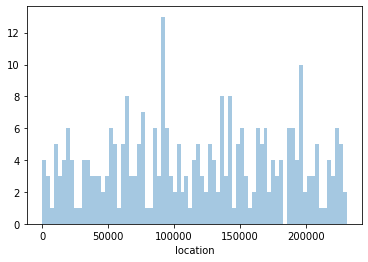

In [6]:
bins = np.arange(0, (int(num_bins) + 1)*3000 + 1, 3000)
sns.distplot(data['location'], hist = True, kde = False, bins = bins);

In [7]:
#counts
counts_and_bins = np.histogram(data['location'], bins = bins)
counts_and_bins[0]

array([ 4,  3,  1,  5,  3,  4,  6,  4,  1,  1,  4,  4,  3,  3,  3,  2,  3,
        6,  5,  1,  5,  8,  3,  3,  5,  7,  1,  1,  6,  3, 13,  6,  3,  2,
        5,  2,  3,  1,  4,  5,  3,  2,  5,  4,  2,  8,  3,  8,  1,  5,  6,
        3,  1,  2,  6,  5,  6,  2,  4,  3,  4,  0,  6,  6,  4, 10,  2,  3,
        3,  5,  1,  1,  4,  3,  6,  5,  2])

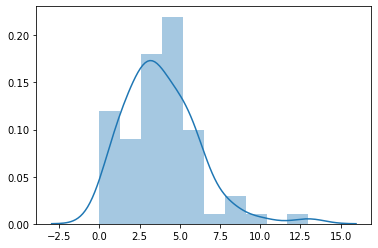

In [8]:
#use seaborn to plot the empirical probability mass function 
sns.distplot(counts_and_bins[0], hist = True);

# 1.2

In [9]:
#divide the total number of data points by the number of intervals to calculate the estimated mu for poisson distribution
estimated_mu = 296 / 77
estimated_mu

3.844155844155844

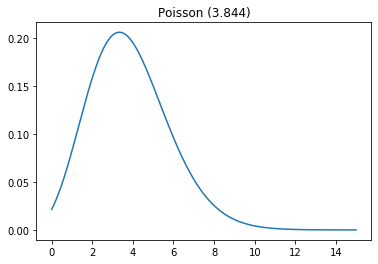

In [10]:
#plot the exact poisson distribution with the estimated mu parameter
x = np.arange(0, 15, 0.01)
y = np.exp(-estimated_mu)*np.power(estimated_mu, x)/factorial(x)
plt.plot(x, y);
plt.title('Poisson (3.844)');

# 1.3

In [11]:
observed_counts = counts_and_bins[0]
observed_counts

array([ 4,  3,  1,  5,  3,  4,  6,  4,  1,  1,  4,  4,  3,  3,  3,  2,  3,
        6,  5,  1,  5,  8,  3,  3,  5,  7,  1,  1,  6,  3, 13,  6,  3,  2,
        5,  2,  3,  1,  4,  5,  3,  2,  5,  4,  2,  8,  3,  8,  1,  5,  6,
        3,  1,  2,  6,  5,  6,  2,  4,  3,  4,  0,  6,  6,  4, 10,  2,  3,
        3,  5,  1,  1,  4,  3,  6,  5,  2])

In [12]:
counts_bins_mid = np.arange(3, 10, 1)
counts_bins = [-float("inf")] + list(counts_bins_mid) + [float("inf")] 

binned_counts = np.histogram(observed_counts, bins = counts_bins)
observed = binned_counts[0]

expected = stats.poisson.pmf(np.arange(3, 9, 1), estimated_mu) * 77
expected = [stats.poisson.cdf(2, estimated_mu) * 77] + list(expected) + [(1 - stats.poisson.cdf(8, estimated_mu)) * 77]
expected = np.array(expected)

observed, expected

(array([21, 18, 11, 11, 10,  1,  3,  2]),
 array([20.16161391, 15.60438877, 14.99642557, 11.5297194 ,  7.38700637,
         4.05668624,  1.94931677,  1.31484299]))

In [13]:
chisquare = stats.chisquare(observed, expected)
chisquare

Power_divergenceResult(statistic=5.642826471840648, pvalue=0.5820168404827049)

# 2.1

In [14]:
diffs = np.diff(data['location'].values)
diffs

array([1144,  112,   44, 1771,    7,   31, 3977, 1760,   61,  249, 1551,
        870, 1109, 1400,  456, 1294,  412,  327,   60, 1197, 1167,  149,
         90,  615,  802, 1195,  712,  171,  331, 2708, 2716, 1713,  612,
        513, 1420, 1180,  295,    5,  320, 1873,  111, 1919, 1928,  546,
        122, 1154, 1099,  221, 1492, 2717,  374,   91,  329, 2471,  291,
        782,  386,  810,  239,  334,   25,  105,  933, 1620,  428, 2945,
        306,  178,  889, 1505,   57,   20,  526,  220,  733, 1053,  234,
         13,  213, 1590,  616, 1512, 1067,  457,  963,  333, 1500,    6,
        482, 1081,  153,   37,   66,  165,   81, 1518, 2082, 3309, 2097,
        383,   16,  111,  491,    6, 1580, 1086,  783,  665,  512,  727,
        147,  316,  573,   44,   73,   58,    8,   38,   36,   76,  251,
        140,  261,   90,  573, 1801, 1513, 1005,  415,  801, 1155, 1275,
        129,  443, 1652,  139, 1032, 1880,  709, 1062, 1039, 3154,  763,
       1486,  167,   24, 1279, 1458, 1110,   92,  2

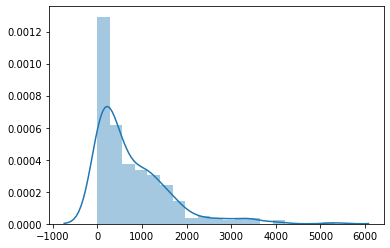

In [15]:
sns.distplot(diffs, hist = True);

# 2.2

In [16]:
e_lambda = 1 / np.mean(diffs)
e_lambda

0.0012894709235234465

In [17]:
observed_scale = 1 / e_lambda
observed_scale

775.5118644067796

In [18]:
e_var = e_lambda ** 2 / len(diffs)
output = f"{e_var:.9f}"
print(output)

0.000000006


In [19]:
#caculate the confidence interval 
[e_lambda - np.sqrt(e_var) * 1.96, e_lambda + np.sqrt(e_var) * 1.96]

[0.0011423221600467591, 0.001436619687000134]

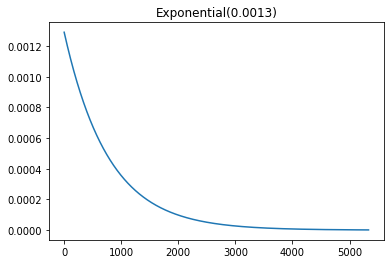

In [20]:
largest_diff = max(diffs)
x = np.arange(largest_diff + 1)
y = stats.expon.pdf(x, scale = 1/ e_lambda)
plt.plot(x, y);
plt.title('Exponential(0.0013)');

# 2.3

In [21]:
#calculate the corresponding theoretical lambda for scale=500
t_lambda = 1 / 500
t_lambda

0.002

# 2.4

In [22]:
SE_null = np.sqrt((1/500) ** 2 / 295)
SE_alt = np.sqrt((1/600) ** 2 / 295)
SE_null, SE_alt

(0.00011644450194791639, 9.7037084956597e-05)

In [23]:
def power(alpha):
    null_mu = 1 / 500
    null_SE = SE_null
    z_score = stats.norm.ppf(alpha)
    result = null_mu + z_score * null_SE
    z_score_alt = (result - 1/600) / SE_alt
    power = stats.norm.cdf(z_score_alt)
    return power

**Plot the power of the test against all possible values of alpha [0,1]**

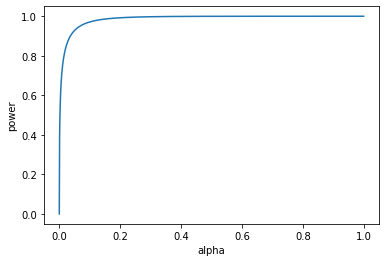

In [24]:
powers = []
for alpha in np.arange(0,1,0.001):
    powers.append(power(alpha))
plt.plot(np.arange(0,1,0.001), powers);
plt.xlabel("alpha");
plt.ylabel('power');